In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
##Reading the csv data using Pandas
df = pd.read_csv('online_shoppers_intention.csv')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Dataset Description

This Dataset has been sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). It consists of e-commerce surfing data belonging to 12330 sessions. The dataset ensures that each entry would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile or period. It has 10 numerical and 8 categorical attributes.

**Source**:

- C. Okan Sakar
  Department of Computer Engineering, 
  Faculty ofEngineering and Natural Sciences, 
  Bahcesehir University,
  34349 Besiktas, Istanbul, Turkey
 
- Yomi Kastro
  Inveon Information Technologies Consultancy and Trade,
  34335 Istanbul, Turkey
  
The papers relevant to this Dataset have been linked [here](https://doi.org/10.1007/s00521-018-3523-0).

Citation:
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).

In [6]:
##Brief overview of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

# Feature Description:

Brief description of all the features in this dataset.

- **'Administrative'**, **'Informational'** and **'ProductRelated'** describe the number of different types of pages visited by the user in the session

- **'Administrative_Duration'**, **'Informational_Duration'** and **'ProductRelated_Duration'** represent the total time spent by the user on 'Administrative', 'Informational' and 'ProductRelated' pages 

- **'BounceRates'** gives us the fraction of one-page sessions for a user (one-page sessions/total sessions)

- **'ExitRates'** gives us the ratio between total number of exits and the total number of views (total exits/total views)

- **'PageValue'** represents the average value for a web page that a user visited before completing an e-commerce transaction

- **'SpecialDay'** indicates the closeness of the site visiting time to a special day. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. Eg. for Valentine’s Day, this feature takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

- **'Month'**, **'OperatingSystems'**, **'Browser'**, **'Region'**, **'TrafficType'**, **'VisitorType'** and **'Weekend'** are all categorical features and are self-explanatory

- **'Revenue'** indicates whether or not a purchase was made by the user

## *Data Exploration*

### 1) Categorical feature exploration

In [7]:
##Function to give insights into the features in more detail
## It gives the Min, Max, Mean and Standard Dev of the distribution for continuous features
## and the number of distinct categories for categorical features (except the boolean ones)

def explore_columns(df):
    for col in df.columns:
        if type(df[col][0]) in [np.int64,np.float64]:
            print(f'Col: {col}\n dtype: {type(df[col][0])}')
            print(f'Min: {np.min(df[col])}\n Max: {np.max(df[col])}\n Mean: {np.mean(df[col])}\n StdDev: {np.std(df[col])}')
            print('\n -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- \n')
        elif type(df[col][0])==bool:
            pass
        else:
            print(f'Col: {col}\n dtype: {type(df[col][0])}')
            print(f'NumCategories: {df[col].nunique()}')
            print('\n -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- \n')

explore_columns(df)

Col: Administrative
 dtype: <class 'numpy.int64'>
Min: 0
 Max: 27
 Mean: 2.3151662611516626
 StdDev: 3.321649400096062

 -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- 

Col: Administrative_Duration
 dtype: <class 'numpy.float64'>
Min: 0.0
 Max: 3398.75
 Mean: 80.81861053933592
 StdDev: 176.77193866708225

 -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- 

Col: Informational
 dtype: <class 'numpy.int64'>
Min: 0
 Max: 24
 Mean: 0.5035685320356853
 StdDev: 1.2701049181901876

 -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- 

Col: Informational_Duration
 dtype: <class 'numpy.float64'>
Min: 0.0
 Max: 2549.375
 Mean: 34.47239792772304
 StdDev: 140.74358671139768

 -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- 

Col: ProductRelated
 dtype: <class 'numpy.int64'>
Min: 0
 Max: 705
 Mean: 31.731467964314678
 StdDev: 44.47369971997643

 -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- 

Col: ProductRelated_Duration
 dtype: <

**Observation_1**:

- All the continuous features have a standard deviation greater than or equal to the mean, indicating the **distributions have a high variance**
- Most categorical variables have 2 or 3 distinct categories, except 'Month' which has 10

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

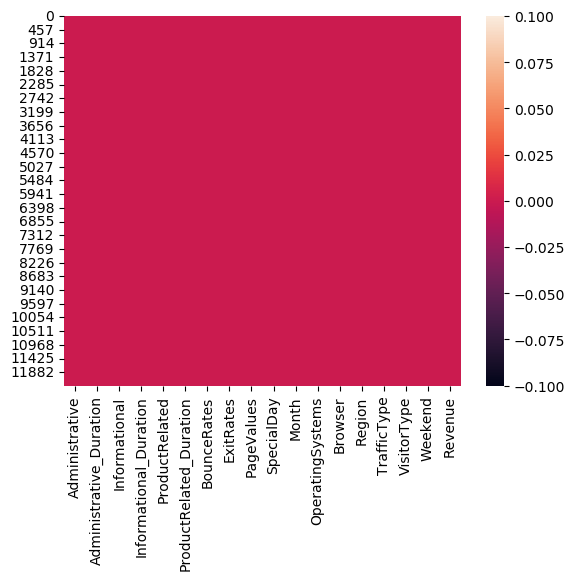

In [8]:
##Checking for null values
sns.heatmap(data=df.isnull())

**Observation_2**:

-The dataset does not have any missing values

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [9]:
##Checking whether or not 'Weekend' affects 'Revenue'

In [10]:
##The code below gives us the fraction of sessions that led to revenue for 'Weekend'=Yes and 'Weekend'=No respectively
df.groupby('Weekend').mean()['Revenue']

Weekend
False    0.148911
True     0.173989
Name: Revenue, dtype: float64

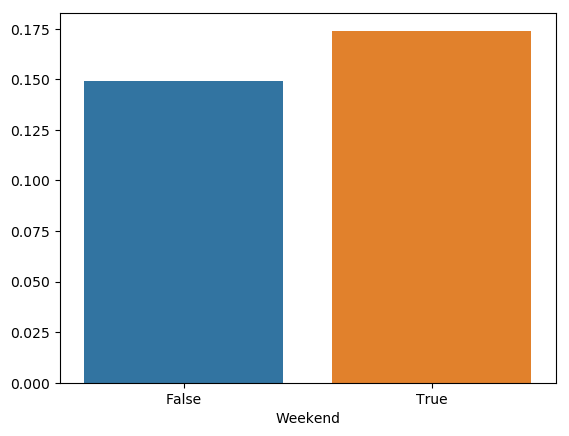

In [11]:
##The barplot below plots the fraction against the respective categories
sns.barplot(x=df.groupby('Weekend').mean()['Revenue'].index, y=df.groupby('Weekend').mean()['Revenue'].values)

**Observation_3**:

- The value of the feature 'Weekend' likely doesn't affect the 'Revenue' much

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [12]:
##Studying 'VisitorType' against 'Revenue'

In [13]:
##The following line of code gives us the fraction of sessions that led to revenue for a particular visitior type
df.groupby('VisitorType').mean()['Revenue']

VisitorType
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: Revenue, dtype: float64

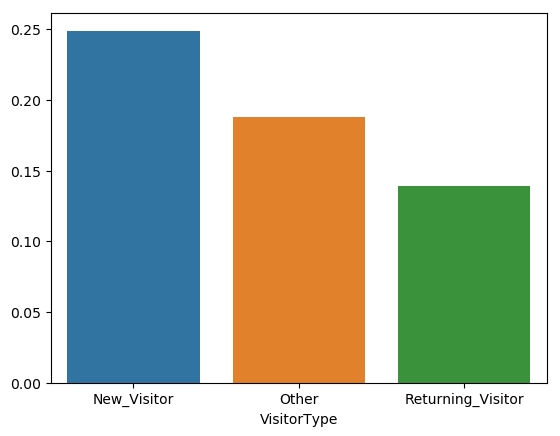

In [14]:
##Barplot plotting the fraction against 'VisitorType'
sns.barplot(x=df.groupby('VisitorType').mean()['Revenue'].index, y=df.groupby('VisitorType').mean()['Revenue'].values)

**Observation_4**:

- A 'New_Visitor' is almost twice as likely to lead to 'Revenue' as compared to a 'Returning_Visitor'

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [15]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [16]:
##Studying 'Revenue' against 'Operating System'

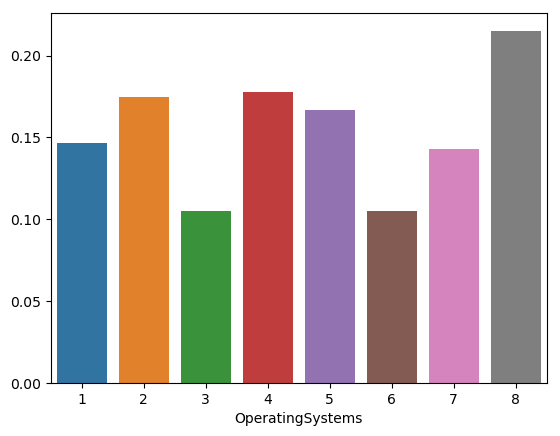

In [17]:
##The following line of code plots the fraction of sessions that led to 'Revenue' for categories in 'OperatingSystems'
sns.barplot(x=df.groupby('OperatingSystems').mean()['Revenue'].index, y=df.groupby('OperatingSystems').mean()['Revenue'].values)

**Observation_5**:
    
- Although some OperatingSystems lead to a better 'Revenue' fraction, the trend is not reliably strong.

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [18]:
##Studying 'Revenue' against 'Region'

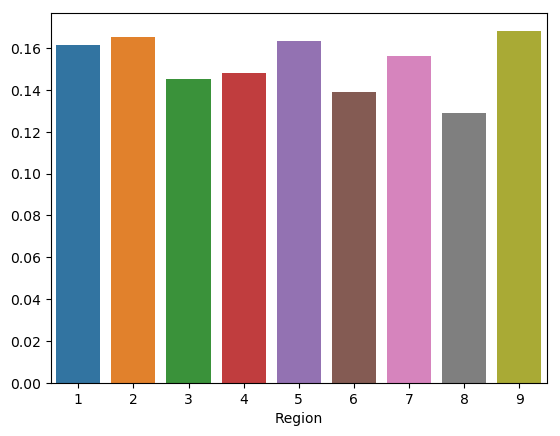

In [19]:
##The following line of code plots the fraction of sessions that led to 'Revenue' for categories in 'Region'
sns.barplot(x=df.groupby('Region').mean()['Revenue'].index, y=df.groupby('Region').mean()['Revenue'].values)

**Observation_6**:

- No concrete trend observed in 'Region' against 'Revenue'

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [20]:
##Studying 'Revenue' against 'Region'

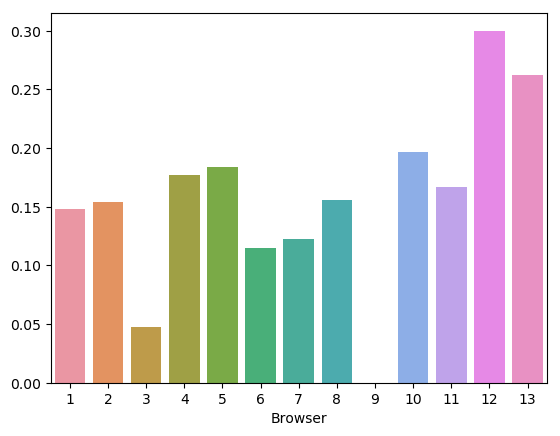

In [21]:
##The following line of code plots the fraction of sessions that led to 'Revenue' for categories in 'Region'
sns.barplot(x=df.groupby('Browser').mean()['Revenue'].index, y=df.groupby('Browser').mean()['Revenue'].values)

**Observation_7**:

- Some categories in 'Browser' lead to a significantly greater 'Revenue' fraction than others
- It is possible that 'Browser' becomes a key feature for our machine learning algorithm

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [22]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [23]:
##Studying 'Revenue' against 'TrafficType'

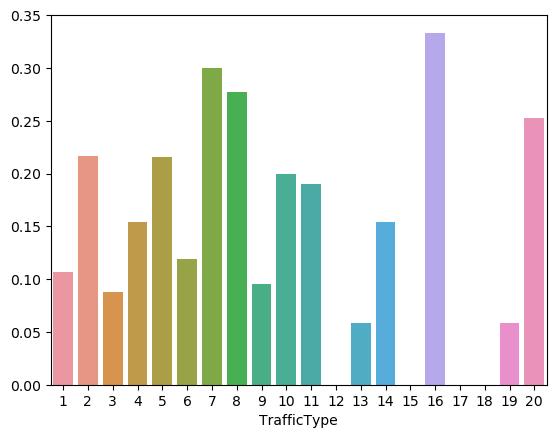

In [24]:
##The following line of code plots the fraction of sessions that led to 'Revenue' for categories in 'TrafficType'
sns.barplot(x=df.groupby('TrafficType').mean()['Revenue'].index, y=df.groupby('TrafficType').mean()['Revenue'].values)

**Observation_8**:

- Some categories in 'TraaficType' have led to significantly higher 'Revenue' fraction while others have led to none
- 'TrafficType' can be an important feature for our algorithm

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [25]:
##Studying 'Revenue' against 'Month'

In [26]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

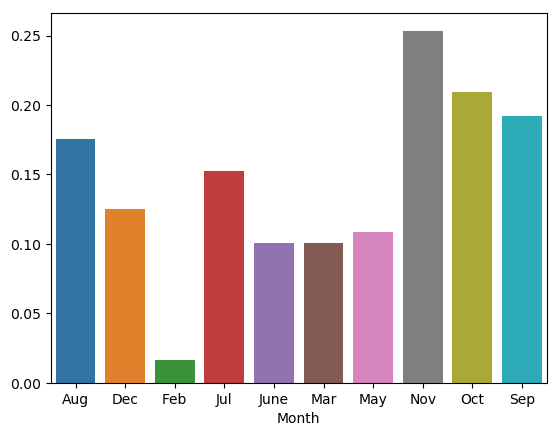

In [27]:
sns.barplot(x=df.groupby('Month').mean()['Revenue'].index, y=df.groupby('Month').mean()['Revenue'].values)

**Observation_9**:

- It is clear that most of the sessions leading to revenue happen in November
- There is some possible correlation/causation relation between 'Month' and 'Revenue'

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

### 2) Continuous feature exploration

In [28]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [29]:
##Studying 'Administrative' feature

In [30]:
df['Administrative'].describe()

count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

In [31]:
##The following line of code gives the percentage of the column 'Administrative' represented by the 5 most frequent values
(df['Administrative'].value_counts().head(5)/len(df['Administrative']))*100

0    46.780211
1    10.981346
2     9.034874
3     7.420925
4     6.204380
Name: Administrative, dtype: float64

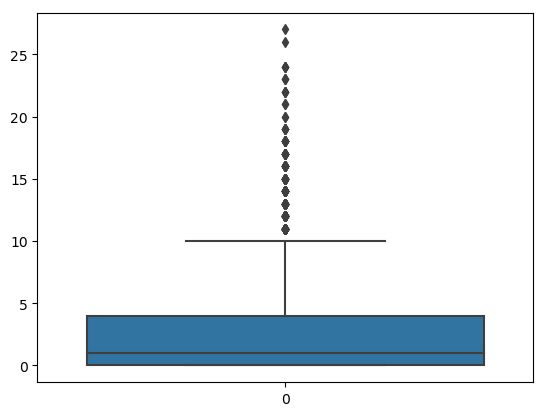

In [32]:
##Distribution of 'Administrative' colored based on 'Revenue'
sns.boxplot(data=df['Administrative'])

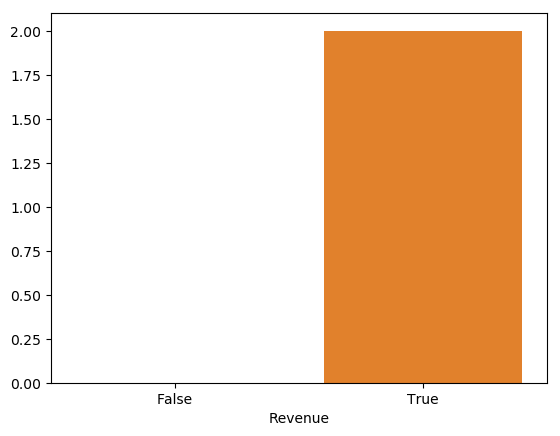

In [33]:
##The following plot shows the median 'Administrative' sessions for sessions where Revenue was/was not generated
##We use median instead of mean owing to the skewed distribution of the column
sns.barplot(x=df.groupby('Revenue').median()['Administrative'].index, y=df.groupby('Revenue').median()['Administrative'].values)

**Observation_10**:

- There are some extreme outliers in the 'Administrative' column that may lead to discrepancies when modelling (can be confirmed considering standard deviation > mean)
- Around 80% of the column is filled with the top 5 most frequent values
- The median 'Administrative' sessions for 'Revenue'=True is 2 against 0 for 'Revenue'=False, implying that more 'Administrative' sessions may lead to higher 'Revenue' conversions

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [34]:
##Studying 'Administrative_Duration'

In [35]:
df['Administrative_Duration'].describe()

count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64

In [36]:
##Percentage of column occupied by 5 most frequent values
(df['Administrative_Duration'].value_counts().head(5)/len(df['Administrative_Duration']))*100

0.0     47.875101
4.0      0.454177
5.0      0.429846
7.0      0.364964
11.0     0.340633
Name: Administrative_Duration, dtype: float64

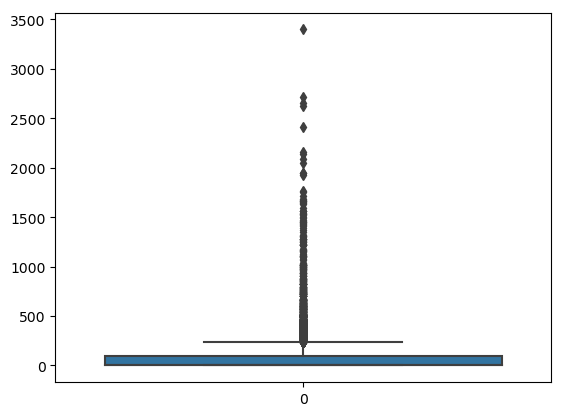

In [37]:
##Distribution of 'Administrative_Duration'
sns.boxplot(data=df['Administrative_Duration'])

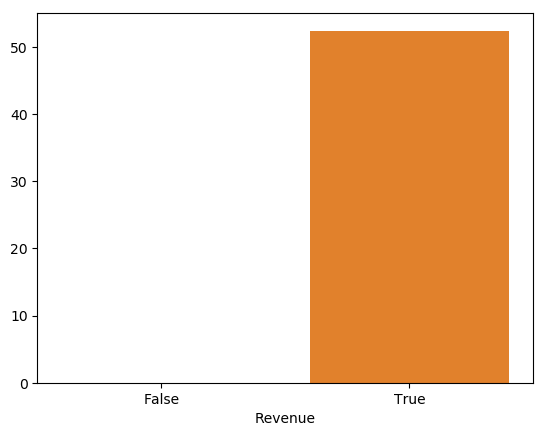

In [38]:
##The following plot shows the median 'Administrative_Duration' sessions for sessions where Revenue was/was not generated
##We use median instead of mean owing to the skewed distribution of the column
sns.barplot(x=df.groupby('Revenue').median()['Administrative_Duration'].index, y=df.groupby('Revenue').median()['Administrative_Duration'].values)

**Observation_11**:

- Around half of the column is represented by 0.0
- There are a significant number extreme outliers in the column (std is almost 2*mean)
- median 'Administrative_Duration' for 'Revenue'= True is 50. 0 for 'Revenue'=False. Indicates that more time spent of 'Administrative' pages may lead to greater 'Revenue'.

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [39]:
##Studying 'Informational'
df['Informational'].describe()

count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64

In [40]:
##percentage columns occupied by the 5 most frequent values
(df['Informational'].value_counts().head(5)/len(df['Informational']))*100

0    78.661800
1     8.442822
2     5.904298
3     3.081914
4     1.800487
Name: Informational, dtype: float64

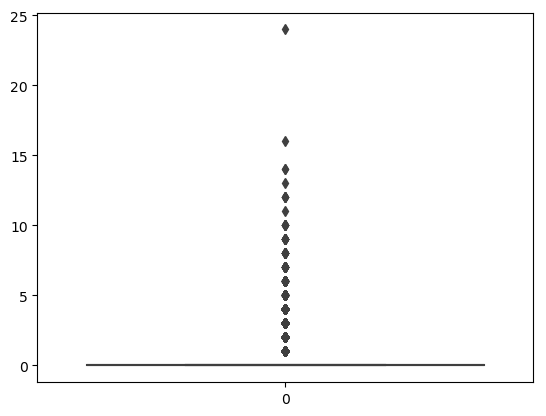

In [41]:
##Distribution of 'Informational' column
sns.boxplot(data=df['Informational'])

In [42]:
##Median 'Informational' grouped by 'Revenue'
df.groupby('Revenue').median()['Informational']

Revenue
False    0
True     0
Name: Informational, dtype: int64

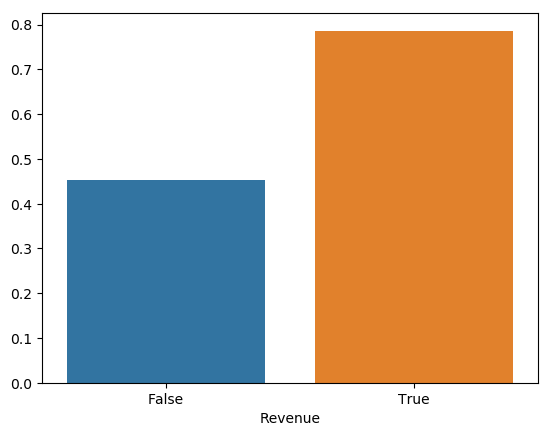

In [43]:
##Barplot showing mean 'Informational' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').mean()['Informational'].index, y=df.groupby('Revenue').mean()['Informational'].values)

**Observation_12**:

- Around 78% of the sessions have seen 0 visits to 'Informational' pages
- The column contains some extreme outliers (std is almost 2.5*mean)
- It is inconclusive whether or not visiting 'Informational' pages has any impact on 'Revenue' generation

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [44]:
##Studying 'Informational_Duration' against 'Revenue'

In [45]:
df['Informational_Duration'].describe()

count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

In [46]:
##Percentage of sessions with zero time spent on 'Informational'
(df['Informational_Duration'].value_counts().head(1)/len(df['Informational_Duration']))*100

0.0    80.494728
Name: Informational_Duration, dtype: float64

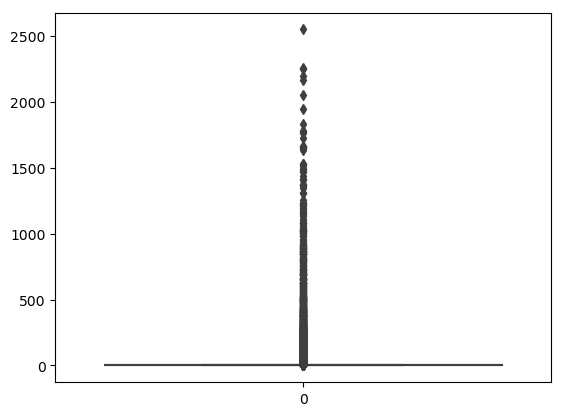

In [47]:
##Distribution of 'Informational_Duration'
sns.boxplot(data=df['Informational_Duration'])

In [48]:
##Median 'Informational_Duration' grouped by 'Revenue'
df.groupby('Revenue').median()['Informational_Duration']

Revenue
False    0.0
True     0.0
Name: Informational_Duration, dtype: float64

In [49]:
##Plot of mean 'Informational_Duration' grouped by 'Revenue'
df.groupby('Revenue').mean()['Informational_Duration']

Revenue
False    30.236237
True     57.611427
Name: Informational_Duration, dtype: float64

**Observation_13**:

- Around 80% of users haven't spent any time on 'Informational' pages
- Extreme outliers in distribution (std>>mean)
- No clear correlation between 'Informational_Duration' and 'Revenue'

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [50]:
##Studying 'ProductRelated' aginst 'Revenue'

In [51]:
df['ProductRelated'].describe()

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

In [52]:
##percentage of column represented by the 5 most frequent values
(df['ProductRelated'].value_counts().head(5)/len(df['ProductRelated']))*100

1    5.044607
2    3.771290
3    3.714517
4    3.276561
6    3.211679
Name: ProductRelated, dtype: float64

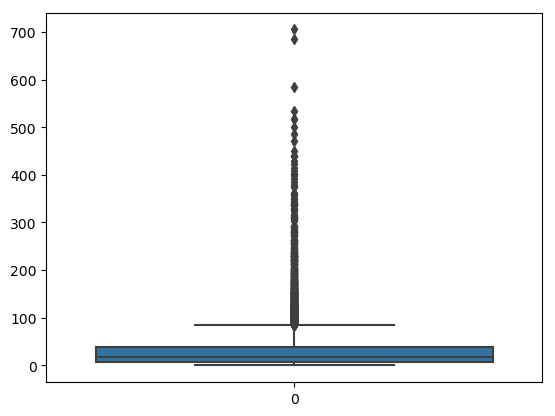

In [53]:
##Distribution of 'ProductRelated'
sns.boxplot(data=df['ProductRelated'])

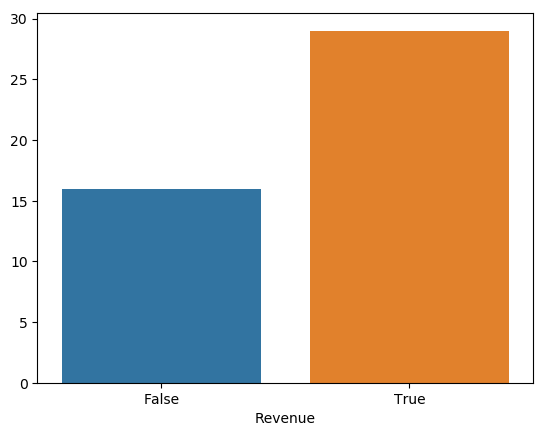

In [54]:
##plot of median 'ProductRelated' grouped by 'Revenue' (median tends to guard against outliers)
sns.barplot(x=df.groupby('Revenue').median()['ProductRelated'].index, y=df.groupby('Revenue').median()['ProductRelated'].values)

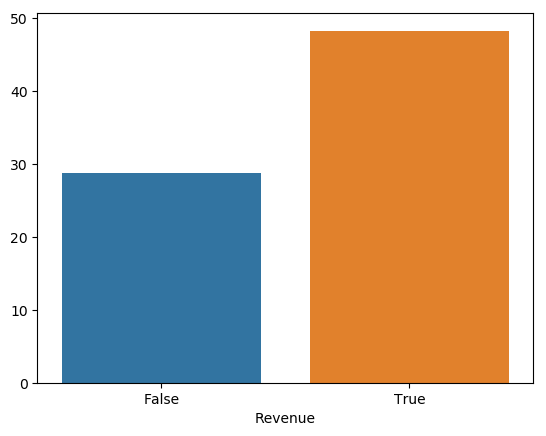

In [55]:
##plot of mean 'ProductRelated' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').mean()['ProductRelated'].index, y=df.groupby('Revenue').mean()['ProductRelated'].values)

**Observation_14**:

- The distribution has some extreme outliers but is less skewed compared to 'Administraive' and 'Informational' pages
- We can state with high confidence that people who purchase from the site tend to visit more 'ProductRelated' pages as compared to those who do not

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [56]:
##Studying 'ProductRelated_Duration' against 'Revenue'

In [57]:
df['ProductRelated_Duration'].describe()

count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157213
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

In [58]:
##percentage occupied by 5 most frequent values
(df['ProductRelated_Duration'].value_counts().head(5)/len(df['ProductRelated_Duration']))*100

0.0     6.123277
17.0    0.170316
8.0     0.137875
11.0    0.137875
15.0    0.129765
Name: ProductRelated_Duration, dtype: float64

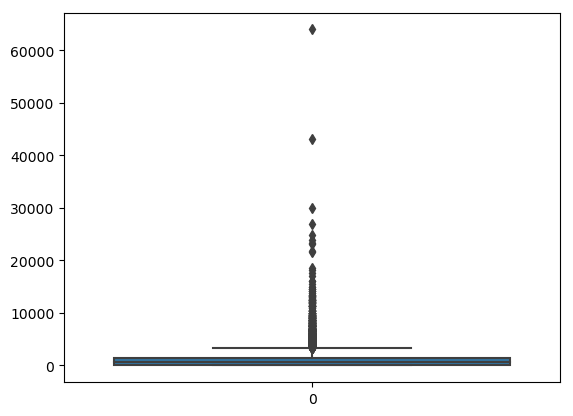

In [59]:
##distribution of 'ProductRelated_Duration'
sns.boxplot(data=df['ProductRelated_Duration'])

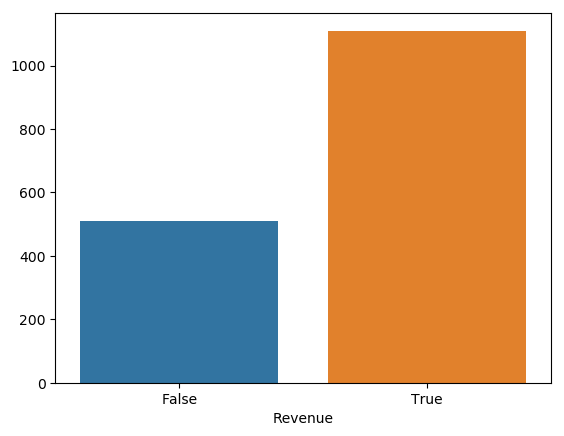

In [60]:
##median 'ProductRelated_Duration' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').median()['ProductRelated_Duration'].index, y=df.groupby('Revenue').median()['ProductRelated_Duration'].values)

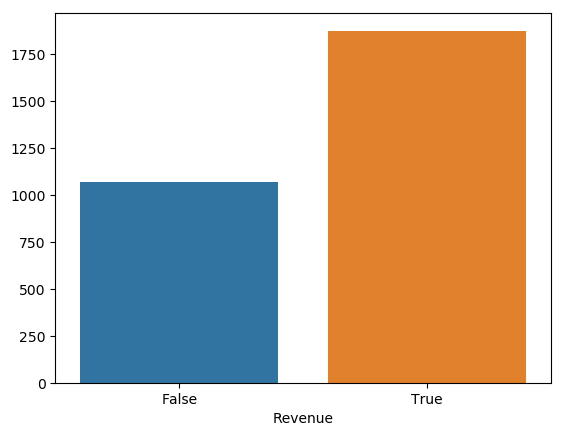

In [61]:
##mean 'ProductRelated_Duration' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').mean()['ProductRelated_Duration'].index, y=df.groupby('Revenue').mean()['ProductRelated_Duration'].values)

**Observation_15**:

- Outliers present in the distribution
- We can state with good confidence that people who purchase tend to spend more time on 'ProductRelated' pages compared to those who don't

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [62]:
##Studying 'BounceRates' against 'Revenue'

In [63]:
df['BounceRates'].describe()

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

In [64]:
##percentage of column occupied by the 5 most frequent values
(df['BounceRates'].value_counts().head(5)/len(df['BounceRates']))*100

0.000000    44.752636
0.200000     5.677210
0.066667     1.086780
0.028571     0.932685
0.050000     0.916464
Name: BounceRates, dtype: float64

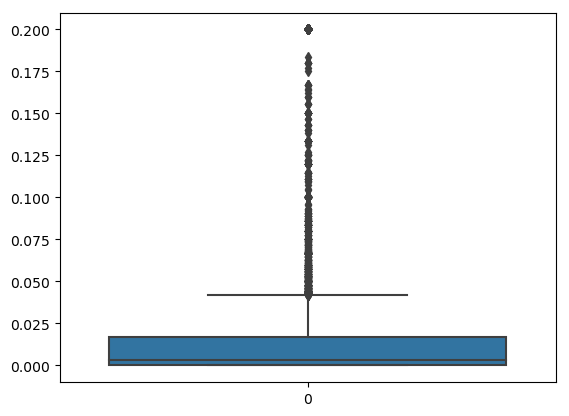

In [65]:
##distribution of 'BounceRates'
sns.boxplot(data=df['BounceRates'])

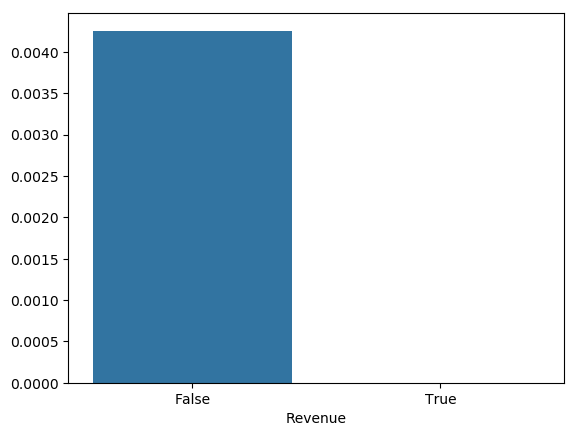

In [66]:
##median 'BounceRates' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').median()['BounceRates'].index, y=df.groupby('Revenue').median()['BounceRates'].values)

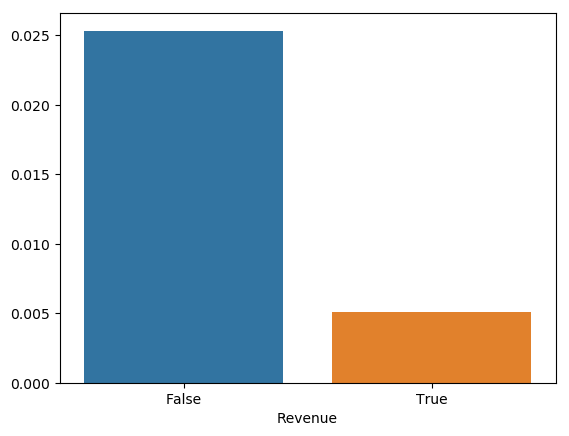

In [67]:
##mean 'BounceRates' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').mean()['BounceRates'].index, y=df.groupby('Revenue').mean()['BounceRates'].values)

**Observation_16**:

- Extreme outliers present
- We can state with high confidence that sessions that generate 'Revenue' tend to have much lower 'BounceRates'

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [68]:
##Studying 'ExitRates' against 'Revenue'

In [69]:
df['ExitRates'].describe()

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

In [70]:
##percentage of column occupied by the 5 most frequent values
(df['ExitRates'].value_counts().head(5)/len(df['ExitRates']))*100

0.200000    5.758313
0.100000    2.741281
0.050000    2.668289
0.033333    2.360097
0.066667    2.165450
Name: ExitRates, dtype: float64

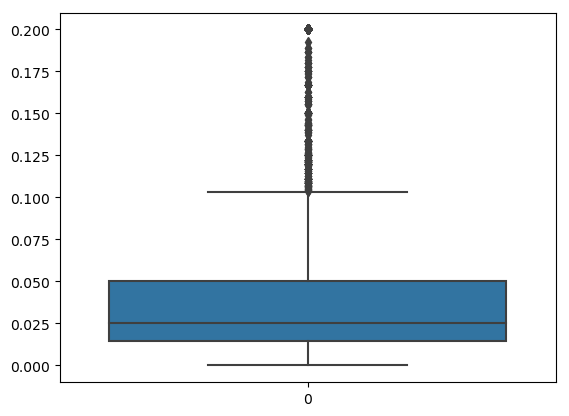

In [71]:
##distribution of 'ExitRates'
sns.boxplot(data=df['ExitRates'])

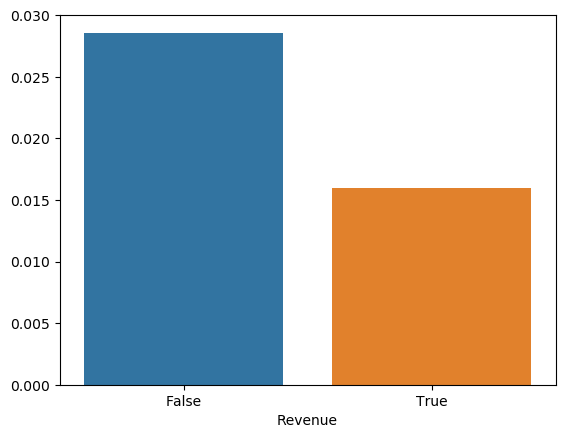

In [72]:
##plot of median 'ExitRates' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').median()['ExitRates'].index, y=df.groupby('Revenue').median()['ExitRates'].values)

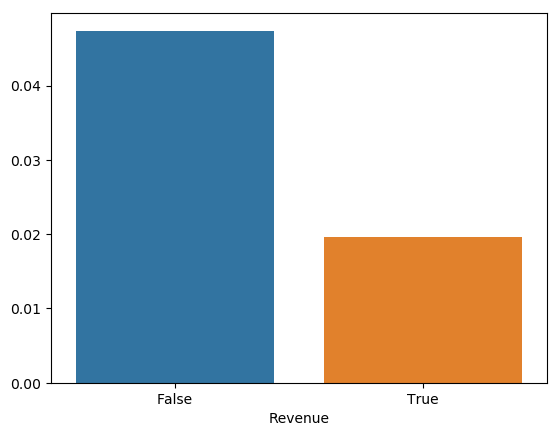

In [73]:
##plot of mean 'ExitRates' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').mean()['ExitRates'].index, y=df.groupby('Revenue').mean()['ExitRates'].values)

**Observation_16**:

- 'Revenue' generating sessions tend to have lower 'ExitRates'

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [74]:
##Studying 'PageValues' against 'Revenue'

In [75]:
df['PageValues'].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

In [76]:
##percentage of column occupied by the 5 most frequent values
(df['PageValues'].value_counts().head()/len(df['PageValues']))*100

0.000000     77.858881
53.988000     0.048662
42.293068     0.024331
40.278152     0.016221
12.558857     0.016221
Name: PageValues, dtype: float64

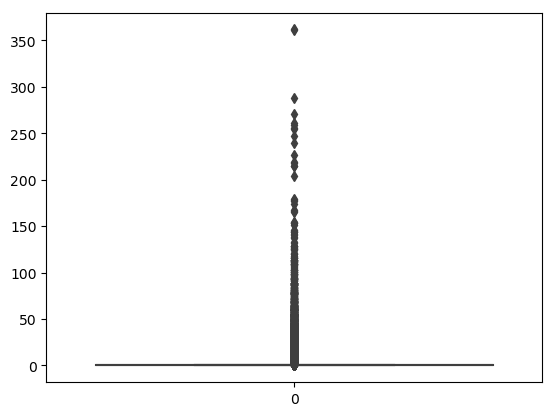

In [77]:
##distribution of 'PageValues'
sns.boxplot(data=df['PageValues'])

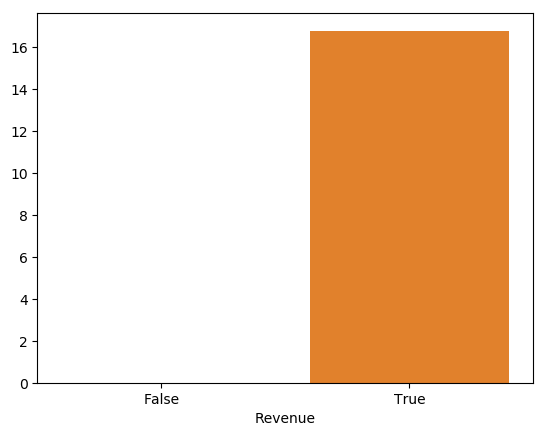

In [78]:
##plot of median 'PageValues' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').median()['PageValues'].index, y=df.groupby('Revenue').median()['PageValues'].values)

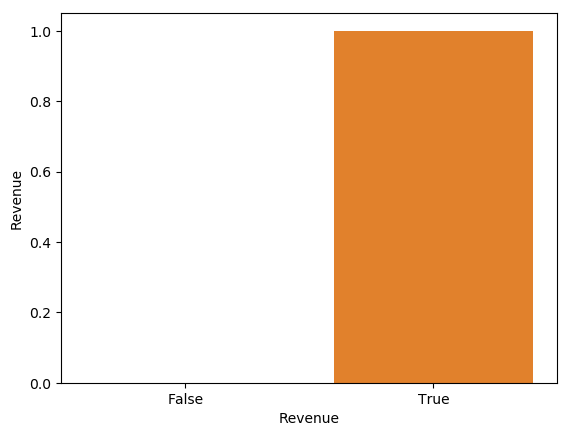

In [79]:
##plot of mean 'PageValues' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').mean()['PageValues'].index, y=df.groupby('Revenue').mean()['PageValues'].index)

**Observation_17**:

- The distribution is highlt skewed with 78% represented by 0.0 and presence of extreme outliers
- 'PageValues' tend to be higher for 'Revenue' generating sessions

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [80]:
##Studying 'SpecialDay' against 'Revenue'

In [81]:
df['SpecialDay'].describe()

count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

In [82]:
##percentage of column occupied by 5 most frequent values
(df['SpecialDay'].value_counts().head()/len(df['SpecialDay']))*100

0.0    89.854015
0.6     2.846715
0.8     2.635848
0.4     1.970803
0.2     1.443633
Name: SpecialDay, dtype: float64

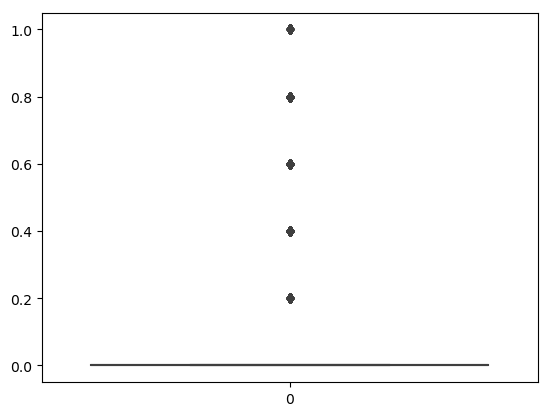

In [83]:
##distribution of 'SpecialDay'
sns.boxplot(data=df['SpecialDay'])

In [84]:
##median 'SpecialDay' grouped by 'Revenue'
df.groupby('Revenue').median()['SpecialDay']

Revenue
False    0.0
True     0.0
Name: SpecialDay, dtype: float64

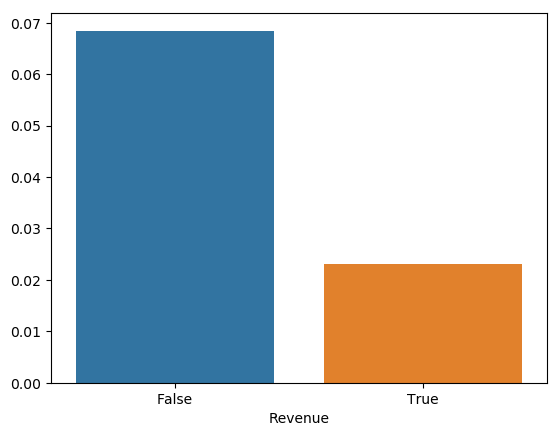

In [85]:
##plot of mean 'SpecialDay' grouped by 'Revenue'
sns.barplot(x=df.groupby('Revenue').mean()['SpecialDay'].index, y=df.groupby('Revenue').mean()['SpecialDay'].values)

**Observation_18**:

- Values occur in clusers of 0.0,0.2,0.4,0.6,0.8 and 1.0
- Around 90% of the column is represented by 0.0
- We can possibly treat this column as a categorical one instead of a continuous one

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

## 3) Correlation between features

In [86]:
##Using a correlation dataframe and a heatmap to get an overview

In [87]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


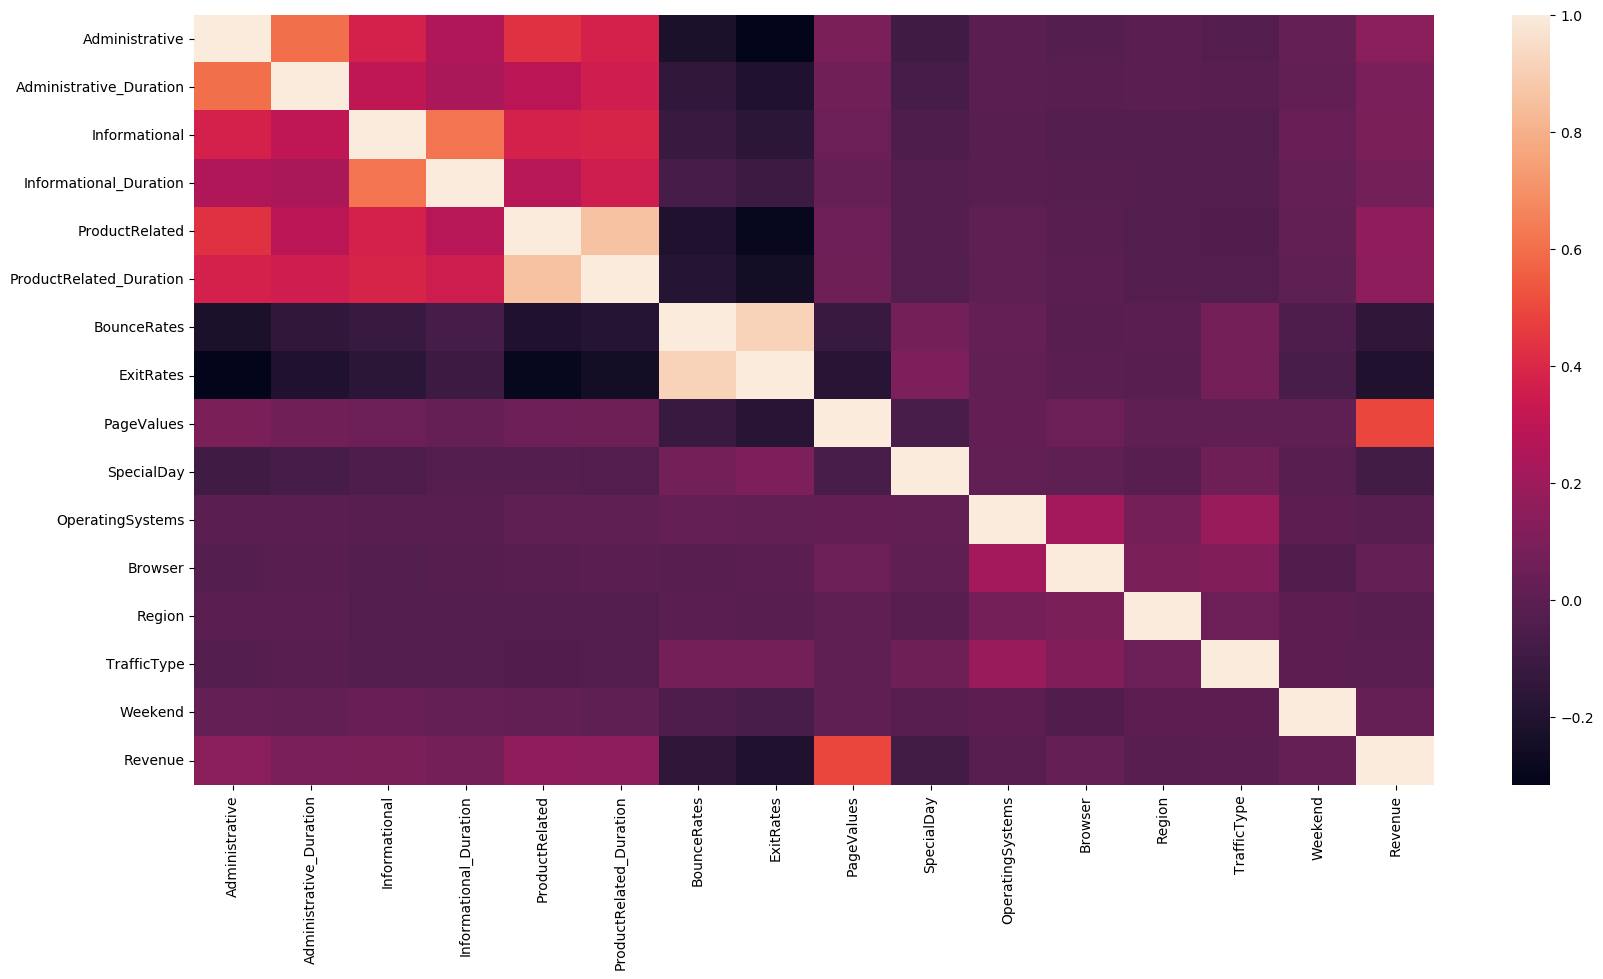

In [88]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),ax=ax)

**Observation_19**:

- Most features exhibit low or average correlation

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [89]:
##Checking the 5 most correlated pairs
df.corr().abs().unstack().sort_values(kind='quicksort',ascending=False)[16:48].head(10)

BounceRates              ExitRates                  0.913004
ExitRates                BounceRates                0.913004
ProductRelated           ProductRelated_Duration    0.860927
ProductRelated_Duration  ProductRelated             0.860927
Informational_Duration   Informational              0.618955
Informational            Informational_Duration     0.618955
Administrative_Duration  Administrative             0.601583
Administrative           Administrative_Duration    0.601583
Revenue                  PageValues                 0.492569
PageValues               Revenue                    0.492569
dtype: float64

**Observation_20**:

- ['BounceRates','ExitRates'] and ['ProductRelated','ProductRelated_Duration'] are highly correlated features (|correlation coefficient| > 0.7)

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [90]:
##Studying the relation between 'BounceRates' and 'ExitRates'

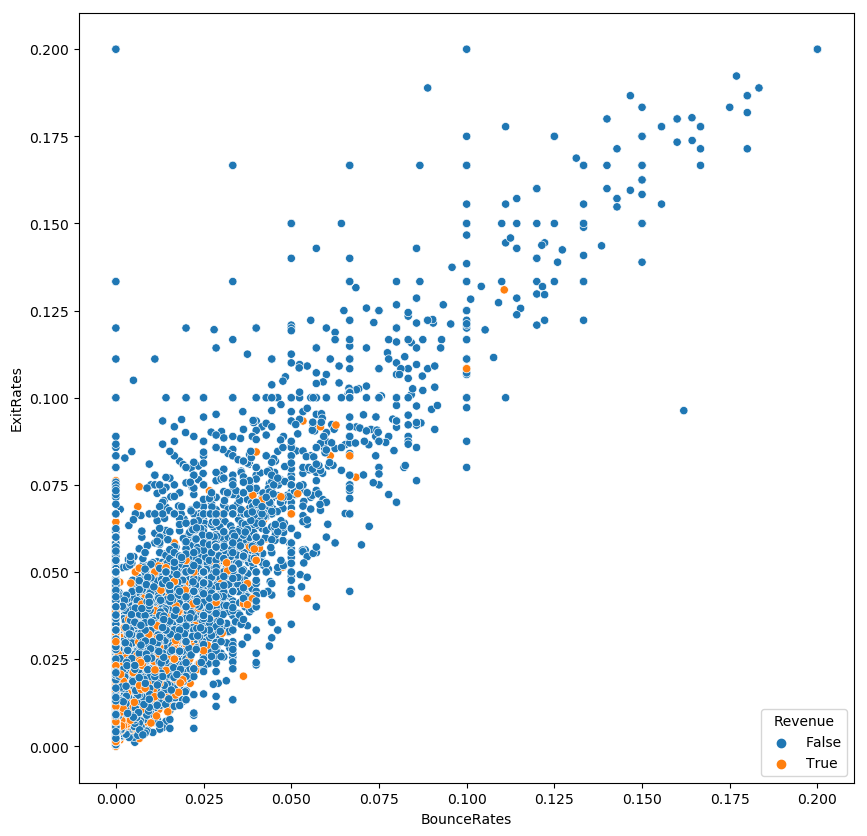

In [91]:
##Scatterplot of 'ExitRates' against 'BounceRates' colored by 'Revenue'
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df['BounceRates'], y=df['ExitRates'],hue=df['Revenue'])

In [92]:
df.groupby('Revenue').median()[['BounceRates','ExitRates']]

,BounceRates,ExitRates
Revenue,,
False,0.004255,0.028571
True,0.000000,0.016000


In [93]:
df.groupby('Revenue').mean()[['BounceRates','ExitRates']]

,BounceRates,ExitRates
Revenue,,
False,0.025317,0.047378
True,0.005117,0.019555


**Observation_21**:

- 'BounceRates' and 'ExitRates' are highly correlated and we need to investigate further to understand if the correlation underlines causation
- A very small fraction of users that generated 'Revenue' had a very high 'BounceRates' or 'ExitRates'

**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**

In [94]:
##Studying 'ProductRelated' against 'ProductRelated_Duration'

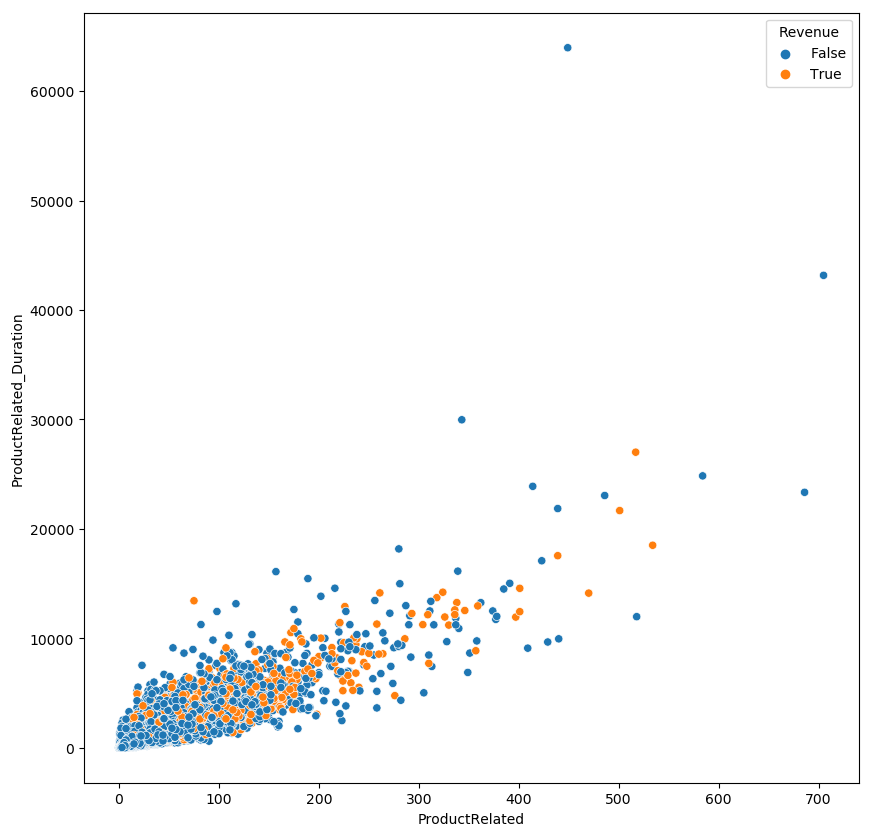

In [95]:
##Scatterplot of 'ProductRelated' against 'ProductRelated_Duration' colored by 'Revenue'
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df['ProductRelated'], y=df['ProductRelated_Duration'],hue=df['Revenue'])

In [96]:
df.groupby('Revenue').median()[['ProductRelated','ProductRelated_Duration']]

,ProductRelated,ProductRelated_Duration
Revenue,,
False,16,510.19000
True,29,1109.90625


In [97]:
df.groupby('Revenue').mean()[['ProductRelated','ProductRelated_Duration']]

,ProductRelated,ProductRelated_Duration
Revenue,,
False,28.714642,1069.987809
True,48.210168,1876.209615
